In [2]:
import networkit as nk

G = nk.graphio.EdgeListReader("\t", 0).read("./MIT8.edgelist")

print(G)

NetworKit.Graph(n=6440, m=251252)


Anzahl der ZHKs:  18


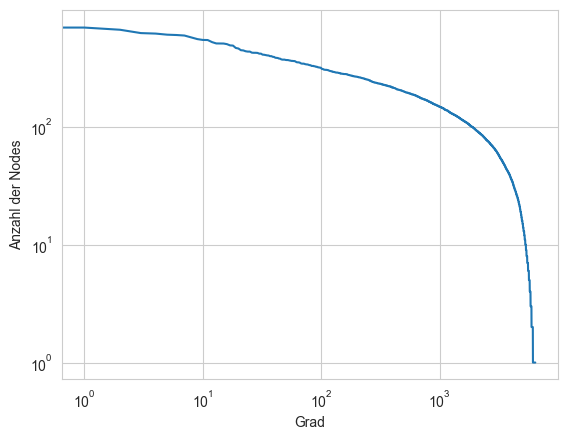

In [3]:
import matplotlib.pyplot as plt

cc = nk.components.ConnectedComponents(G)
cc.run()

print("Anzahl der ZHKs: ", cc.numberOfComponents())

lzhk = cc.extractLargestConnectedComponent(G)

dd = sorted(nk.centrality.DegreeCentrality(G).run().scores(), reverse=True)
plt.xscale("log")
plt.xlabel("Grad")
plt.yscale("log")
plt.ylabel("Anzahl der Nodes")
plt.loglog(dd)
plt.show()

In [4]:
import powerlaw

results = powerlaw.Fit(list(cc.getComponentSizes().values()))
print(results.power_law.alpha)

Calculating best minimal value for power law fit
2.879837460785231%


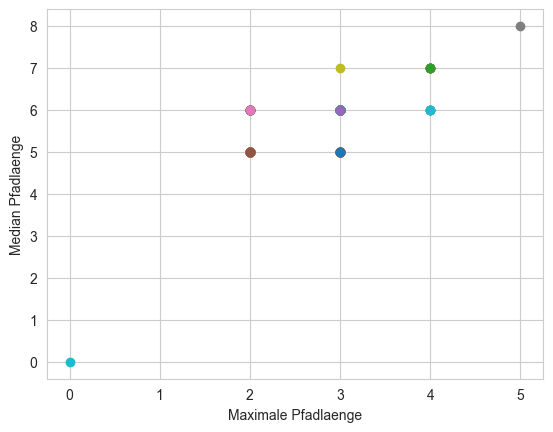

In [23]:
import math
import numpy as np
from networkit.distance import BFS

valuePairs = list(tuple())

plt.xlabel("Maximale Pfadlaenge")
plt.ylabel("Median Pfadlaenge")

for i in range(math.floor(lzhk.numberOfNodes()/25)):
    v = 0 + (i * 25)

    bfs = BFS(lzhk, v)
    bfs.run()


    bfsdist = list(bfs.getDistances())

    bfsdistnumpy = np.array(bfsdist)

    bfsdistnumpy = bfsdistnumpy[bfsdistnumpy < 100000]

    plt.scatter(np.median(bfsdistnumpy), np.max(bfsdistnumpy))

plt.show()